In [25]:
#import neccessary libraries
import pandas as pd
import psycopg2 
import numpy as np
import matplotlib.pyplot as plt
import folium #map

In [8]:
# import data from csv
df_realty = pd.read_csv('eda.csv')

In [9]:
# quick overview of data
df_realty.head(10)

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price
0,7129300520,3.0,1.00,1180.0,5650.0,1.0,NaN,0.0,3,7,...,0.0,1955,0.0,98178,47.5112,-122.257,1340.0,5650.0,2014-10-13,221900.0
1,6414100192,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3,7,...,400.0,1951,19910.0,98125,47.7210,-122.319,1690.0,7639.0,2014-12-09,538000.0
2,5631500400,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3,6,...,0.0,1933,NaN,98028,47.7379,-122.233,2720.0,8062.0,2015-02-25,180000.0
3,2487200875,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5,7,...,910.0,1965,0.0,98136,47.5208,-122.393,1360.0,5000.0,2014-12-09,604000.0
4,1954400510,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3,8,...,0.0,1987,0.0,98074,47.6168,-122.045,1800.0,7503.0,2015-02-18,510000.0
5,7237550310,4.0,4.50,5420.0,101930.0,1.0,0.0,0.0,3,11,...,1530.0,2001,0.0,98053,47.6561,-122.005,4760.0,101930.0,2014-05-12,1230000.0
6,1321400060,3.0,2.25,1715.0,6819.0,2.0,0.0,0.0,3,7,...,NaN,1995,0.0,98003,47.3097,-122.327,2238.0,6819.0,2014-06-27,257500.0
7,2008000270,3.0,1.50,1060.0,9711.0,1.0,0.0,NaN,3,7,...,0.0,1963,0.0,98198,47.4095,-122.315,1650.0,9711.0,2015-01-15,291850.0
8,2414600126,3.0,1.00,1780.0,7470.0,1.0,0.0,0.0,3,7,...,730.0,1960,0.0,98146,47.5123,-122.337,1780.0,8113.0,2015-04-15,229500.0
9,3793500160,3.0,2.50,1890.0,6560.0,2.0,0.0,0.0,3,7,...,0.0,2003,0.0,98038,47.3684,-122.031,2390.0,7570.0,2015-03-12,323000.0


we can see that number of bedrooms and the number of bathrooms seem to be float-values, we might check that to see if that's neccessary.

In [10]:
df_realty['bedrooms'].value_counts()
df_realty['bathrooms'].value_counts()

bathrooms
2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.75       2
8.00       2
6.25       2
6.50       2
7.50       1
7.75       1
Name: count, dtype: int64

'Bathrooms' return several float values, bedrooms only integer. we will change this datatype as well to integer.

In [11]:
#quick overview of main characteristics of data
df_realty.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19206.000000,21534.000000,21597.000000,21597.000000,21597.000000,21145.000000,21597.000000,17749.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04
mean,4.580474e+09,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007602,0.233863,3.409825,7.657915,1788.596842,291.857224,1970.999676,836.650516,98077.951845,47.560093,-122.213983,1986.620318,12758.283512,5.402966e+05
std,2.876736e+09,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086858,0.765686,0.650546,1.173200,827.759761,442.490863,29.375234,4000.110554,53.513072,0.138552,0.140724,685.230472,27274.441950,3.673681e+05
min,1.000102e+06,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.800000e+04
25%,2.123049e+09,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,3.220000e+05
50%,3.904930e+09,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,4.500000e+05
75%,7.308900e+09,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,6.450000e+05
max,9.900000e+09,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,20150.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06


In [12]:
# change the column to integer
df_realty = df_realty.astype({'bedrooms': int})

In [13]:
#quick overview of entries
df_realty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  float64
 4   sqft_lot       21597 non-null  float64
 5   floors         21597 non-null  float64
 6   waterfront     19206 non-null  float64
 7   view           21534 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  float64
 11  sqft_basement  21145 non-null  float64
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   17749 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  float64
 18  sqft_l

As we can see, there are several columns that are missing values, espacially 'waterfront', 'view', 'sqft_basement' and 'yr_renovated'.
We need to replace those values so we can make some assumptions:
- waterfront and view are two main drivers for price, so it is highly likely, that those values are false or just 0. we will replace them in the next steps. 
- for the size of the basement, we assume that the house has no basement, so we also replace the NaNs with 0
- Also for the year of renovation, it is highly likely that if there was a renovation, it would be mentioned. We will better check those NaNs against the overall condition and the year the house was built, just to be sure. Otherwise, we will replace them with 0

Also, the date column seems not to be formatted correctly. We will change that and try to get all dates into the same format and type.

In [15]:
# lets see the values for 'waterfront' 
df_realty['waterfront'].value_counts()
# assumed that houses at waterfront would have a TRUE and not NaN 
df_realty.fillna({'waterfront': 0})
# change the column to boolean
df_realty = df_realty.astype({'waterfront': bool})

In [16]:
# checking values of 'view'
df_realty['view'].value_counts()

view
0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: count, dtype: int64

In [17]:
# change the column 'bedrooms' to integer
df_realty['bedrooms'] = df_realty['bedrooms'].astype(int)
# replace emtpy values in 'view' with 0
df_realty['view'] = df_realty['view'].fillna(0).astype(int)
# replace emtpy values in 'sqft_basement' with 0
df_realty['sqft_basement'] = df_realty['sqft_basement'].fillna(0)

The value of 'yr_renovated' in line 2 seems odd. this should be a 4-digit number. Also, 0 seems not a usefull value for years, we prefer to use NaNs if values are missing. We also add a new column to determin if a house has been renovated or not:

In [18]:
# change 0 to NaN (important for additional column)
df_realty['yr_built'] = df_realty['yr_built'].replace(0, np.nan)
df_realty['yr_renovated'] = df_realty['yr_renovated'].replace(0, np.nan)

# shorten 5-digit to 4 digits
df_realty['yr_built'] = df_realty['yr_built'].apply(lambda x: int(x)//10 if pd.notna(x) and x > 9999 else x)
df_realty['yr_renovated'] = df_realty['yr_renovated'].apply(lambda x: int(x)//10 if pd.notna(x) and x > 9999 else x)

# convert both columns to integer
df_realty['yr_built'] = df_realty['yr_built'].astype('Int64')
df_realty['yr_renovated'] = df_realty['yr_renovated'].astype('Int64')

# creating a new column from NaNs of yr_renovated (boolean)
df_realty['ever_renovated'] = df_realty['yr_renovated'].notna()

df_realty.head(10)

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,ever_renovated
0,7129300520,3,1.00,1180.0,5650.0,1.0,True,0,3,7,...,1955,<NA>,98178,47.5112,-122.257,1340.0,5650.0,2014-10-13,221900.0,False
1,6414100192,3,2.25,2570.0,7242.0,2.0,False,0,3,7,...,1951,1991,98125,47.7210,-122.319,1690.0,7639.0,2014-12-09,538000.0,True
2,5631500400,2,1.00,770.0,10000.0,1.0,False,0,3,6,...,1933,<NA>,98028,47.7379,-122.233,2720.0,8062.0,2015-02-25,180000.0,False
3,2487200875,4,3.00,1960.0,5000.0,1.0,False,0,5,7,...,1965,<NA>,98136,47.5208,-122.393,1360.0,5000.0,2014-12-09,604000.0,False
4,1954400510,3,2.00,1680.0,8080.0,1.0,False,0,3,8,...,1987,<NA>,98074,47.6168,-122.045,1800.0,7503.0,2015-02-18,510000.0,False
5,7237550310,4,4.50,5420.0,101930.0,1.0,False,0,3,11,...,2001,<NA>,98053,47.6561,-122.005,4760.0,101930.0,2014-05-12,1230000.0,False
6,1321400060,3,2.25,1715.0,6819.0,2.0,False,0,3,7,...,1995,<NA>,98003,47.3097,-122.327,2238.0,6819.0,2014-06-27,257500.0,False
7,2008000270,3,1.50,1060.0,9711.0,1.0,False,0,3,7,...,1963,<NA>,98198,47.4095,-122.315,1650.0,9711.0,2015-01-15,291850.0,False
8,2414600126,3,1.00,1780.0,7470.0,1.0,False,0,3,7,...,1960,<NA>,98146,47.5123,-122.337,1780.0,8113.0,2015-04-15,229500.0,False
9,3793500160,3,2.50,1890.0,6560.0,2.0,False,0,3,7,...,2003,<NA>,98038,47.3684,-122.031,2390.0,7570.0,2015-03-12,323000.0,False


Let's check the Date column. At the moment it has the data type Object. We can simply take the first entry.

In [19]:
# data type of first entry of date column 
type(df_realty['date'][0])

str

It's a string. We will try to change the format accordingly.

In [20]:
# change "date" dtype to datetime with format %Y/%m/%d
df_realty['date'] = pd.to_datetime(df_realty['date'], format='%Y-%m-%d')
df_realty.head(10)

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,ever_renovated
0,7129300520,3,1.00,1180.0,5650.0,1.0,True,0,3,7,...,1955,<NA>,98178,47.5112,-122.257,1340.0,5650.0,2014-10-13,221900.0,False
1,6414100192,3,2.25,2570.0,7242.0,2.0,False,0,3,7,...,1951,1991,98125,47.7210,-122.319,1690.0,7639.0,2014-12-09,538000.0,True
2,5631500400,2,1.00,770.0,10000.0,1.0,False,0,3,6,...,1933,<NA>,98028,47.7379,-122.233,2720.0,8062.0,2015-02-25,180000.0,False
3,2487200875,4,3.00,1960.0,5000.0,1.0,False,0,5,7,...,1965,<NA>,98136,47.5208,-122.393,1360.0,5000.0,2014-12-09,604000.0,False
4,1954400510,3,2.00,1680.0,8080.0,1.0,False,0,3,8,...,1987,<NA>,98074,47.6168,-122.045,1800.0,7503.0,2015-02-18,510000.0,False
5,7237550310,4,4.50,5420.0,101930.0,1.0,False,0,3,11,...,2001,<NA>,98053,47.6561,-122.005,4760.0,101930.0,2014-05-12,1230000.0,False
6,1321400060,3,2.25,1715.0,6819.0,2.0,False,0,3,7,...,1995,<NA>,98003,47.3097,-122.327,2238.0,6819.0,2014-06-27,257500.0,False
7,2008000270,3,1.50,1060.0,9711.0,1.0,False,0,3,7,...,1963,<NA>,98198,47.4095,-122.315,1650.0,9711.0,2015-01-15,291850.0,False
8,2414600126,3,1.00,1780.0,7470.0,1.0,False,0,3,7,...,1960,<NA>,98146,47.5123,-122.337,1780.0,8113.0,2015-04-15,229500.0,False
9,3793500160,3,2.50,1890.0,6560.0,2.0,False,0,3,7,...,2003,<NA>,98038,47.3684,-122.031,2390.0,7570.0,2015-03-12,323000.0,False


To determine what 'condition' means, we need to quickly check which value is highest and lowest:

In [21]:
# checking the range of conditions
df_realty['condition'].unique()
df_realty['condition'].value_counts()
# assuming that there are 5 categories
df_realty.sort_values(['condition', 'price'], ascending=True).head(10)
# checking over price to see which condition is best and worst

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,ever_renovated
15279,40000362,2,1.00,780.0,16344.0,1.0,False,0,1,5,...,1942,<NA>,98168,47.4739,-122.280,1700.0,10387.0,2014-05-06,78000.0,False
16184,3028200080,2,1.00,730.0,9975.0,1.0,True,0,1,5,...,1943,<NA>,98168,47.4808,-122.315,860.0,9000.0,2015-03-24,81000.0,False
13615,2023049218,2,1.00,930.0,7740.0,1.0,False,0,1,5,...,1932,<NA>,98148,47.4611,-122.324,1620.0,8584.0,2014-07-16,105500.0,False
4647,859000110,1,1.00,500.0,7440.0,1.0,False,0,1,5,...,1928,<NA>,98106,47.5252,-122.362,1350.0,7440.0,2014-10-02,125000.0,False
16879,3501100050,3,1.00,1230.0,4800.0,1.5,False,0,1,6,...,1916,<NA>,98117,47.6941,-122.365,1230.0,4800.0,2014-12-10,125000.0,False
18318,9272202260,3,1.00,1200.0,7000.0,2.0,False,0,1,7,...,1908,<NA>,98116,47.5883,-122.384,3290.0,6000.0,2014-09-24,130000.0,False
15698,3089000005,2,1.00,850.0,54000.0,1.5,False,0,1,4,...,1950,<NA>,98023,47.2959,-122.377,1550.0,14440.0,2014-07-24,150000.0,False
7629,4008400515,1,0.75,780.0,77603.0,1.0,False,0,1,5,...,1945,<NA>,98058,47.4396,-122.104,1750.0,30847.0,2015-01-20,190000.0,False
12294,2570600140,3,2.25,1510.0,9600.0,1.0,False,0,1,7,...,1966,<NA>,98028,47.7758,-122.238,1870.0,10681.0,2015-01-28,196000.0,False
3971,6324000090,2,1.00,990.0,8140.0,1.0,False,0,1,6,...,1910,<NA>,98116,47.5828,-122.382,2150.0,5000.0,2015-05-11,210000.0,False


Lets talk about location. We will first check how many area codes we are talking about. probably that's a good category to determine if it's a nicer or less nicer neighborhood if we check for the average price.

In [22]:
# checking how many zip-codes there are
df_realty['zipcode'].nunique()
df_realty['zipcode'].value_counts()
# calculating the average price for each 
df_avg_price_zip = df_realty.groupby("zipcode")["price"].mean()
df_avg_price_zip.sort_values(ascending=False)
print(df_avg_price_zip)

zipcode
98001    2.811949e+05
98002    2.342840e+05
98003    2.941113e+05
98004    1.356524e+06
98005    8.102897e+05
             ...     
98177    6.764194e+05
98178    3.106128e+05
98188    2.890783e+05
98198    3.028967e+05
98199    7.921879e+05
Name: price, Length: 70, dtype: float64


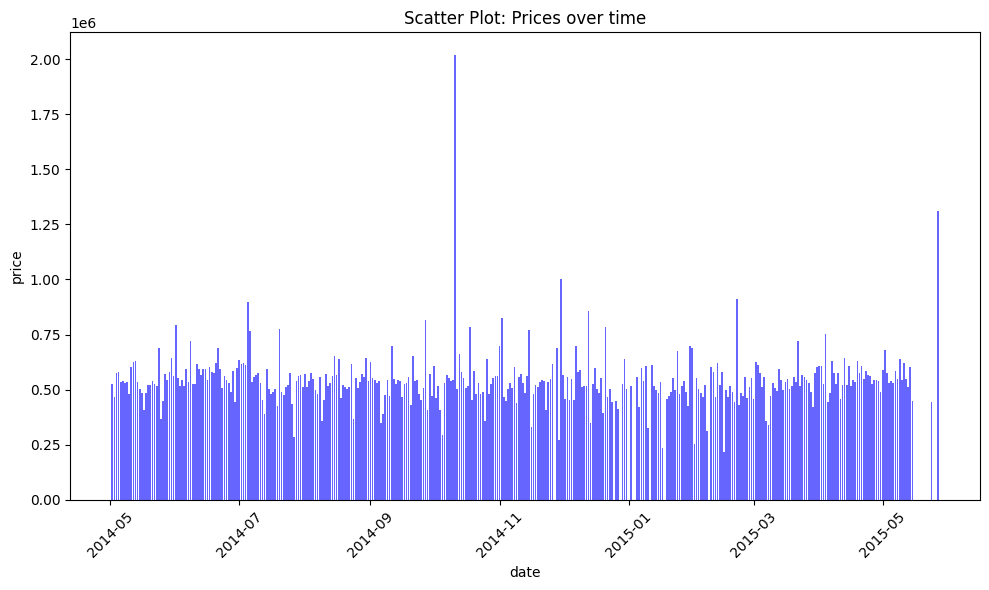

In [29]:
# Scatter plot: avg price vs date
avg_price_per_date = df_realty.groupby('date')['price'].mean().reset_index()

plt.figure(figsize=(10,6))
plt.bar(avg_price_per_date['date'], avg_price_per_date['price'], alpha=0.6, color='blue')

# Achsen beschriften
plt.xlabel('date')
plt.ylabel('price')
plt.title('Scatter Plot: Prices over time')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [28]:

coords = list(zip(df_realty['lat'], df_realty['long']))

# 2️⃣ Karte zentrieren (Mittelpunkt der Koordinaten)
map_center = [df_realty['lat'].mean(), df_realty['long'].mean()]
m = folium.Map(location=map_center, zoom_start=10)

# 3️⃣ Marker für jede Immobilie
for lat, lon in coords:
    folium.Marker(location=[lat, lon]).add_to(m)
# show map
#m